In [7]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%pylab inline
import geopandas as gpd

Populating the interactive namespace from numpy and matplotlib


In [8]:
cc17do = pd.read_csv('monthly_do_df_cc.csv',index_col='DOLocationID')
cc17do.fillna(0,inplace=True)
cc18do = pd.read_csv('monthly_do_df_cc18.csv',index_col='DOLocationID')
cc18do.fillna(0,inplace=True)

In [9]:
cc_p = pd.concat([cc17do,cc18do],axis=1)

In [10]:
cc_p .fillna(0,inplace=True)

In [11]:
cc_p.shape

(264, 24)

(1.5, 9.5)

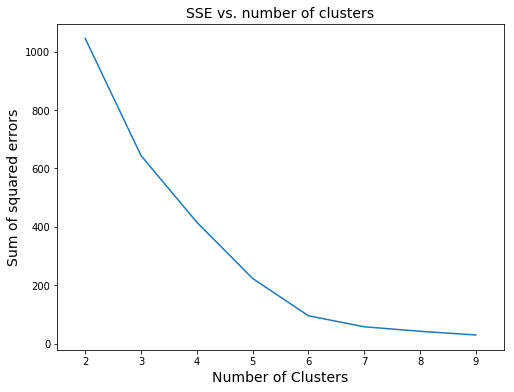

In [354]:
SSE = []
for i in range(2,10):
    km = KMeans(n_clusters = i,random_state=0)
    res=km.fit(cc_p)
    SSE.append(res.inertia_)


fig,ax = plt.subplots(figsize=(8,6))
plt.gca()
plt.plot(range(2,10),SSE)
plt.xlabel("Number of Clusters",fontsize=14.0)
plt.ylabel("Sum of squared errors",fontsize=14.0)
plt.title("SSE vs. number of clusters",fontsize=14.0)
plt.xlim(1.5,9.5)

In [13]:
KM=KMeans(n_clusters=4,random_state=100)

In [14]:
kmeans_3 = KM.fit(cc_p)

In [15]:
scor=KM.fit_predict(cc_p)

In [16]:
res=pd.DataFrame(KM.transform(cc_p))
res.head()

,0,1,2,3
0,0.406113,1.758345,1.056857,3.069754
1,1.469765,1.364617,1.232383,2.325413
2,0.841308,0.546070,0.214990,1.882416
3,0.260372,1.104065,0.408883,2.423081
4,0.339198,1.435264,0.764470,2.746781


In [17]:
res=pd.concat((res,pd.DataFrame(KM.fit_predict(cc_p))),axis=1)

In [18]:
res.columns=list(range(4))+["cluster"]

In [19]:
res.loc[:,"score"]=res.apply(lambda x: x[int(x["cluster"])],axis=1)

In [20]:
cc_p['k3_labels'] = kmeans_3.labels_

In [21]:
pd.Series(kmeans_3.labels_).value_counts()

0    100
2     84
1     75
3      5
dtype: int64

In [22]:
res.sort_values("score",ascending=False)[:5]

,0,1,2,3,cluster,score
108,3.079857,2.220984,2.611794,1.870157,3,1.870157
197,2.871179,2.028924,2.403712,1.681837,3,1.681837
1,1.469765,1.364617,1.232383,2.325413,2,1.232383
102,3.416554,2.180796,2.812376,1.204966,3,1.204966
103,1.227762,1.471558,1.156619,2.501330,2,1.156619


In [25]:
gdf.iloc[1]

Shape_Leng                                              0.43347
Shape_Area                                           0.00486634
zone                                                Jamaica Bay
LocationID                                                    2
borough                                                  Queens
geometry      (POLYGON ((1033269.243591294 172126.0078125, 1...
Name: 2, dtype: object

In [27]:
gdf.iloc[104]

Shape_Leng                                            0.0774253
Shape_Area                                          0.000368636
zone              Governor's Island/Ellis Island/Liberty Island
LocationID                                                  103
borough                                               Manhattan
geometry      POLYGON ((979605.7587890774 191880.5750121921,...
Name: 105, dtype: object

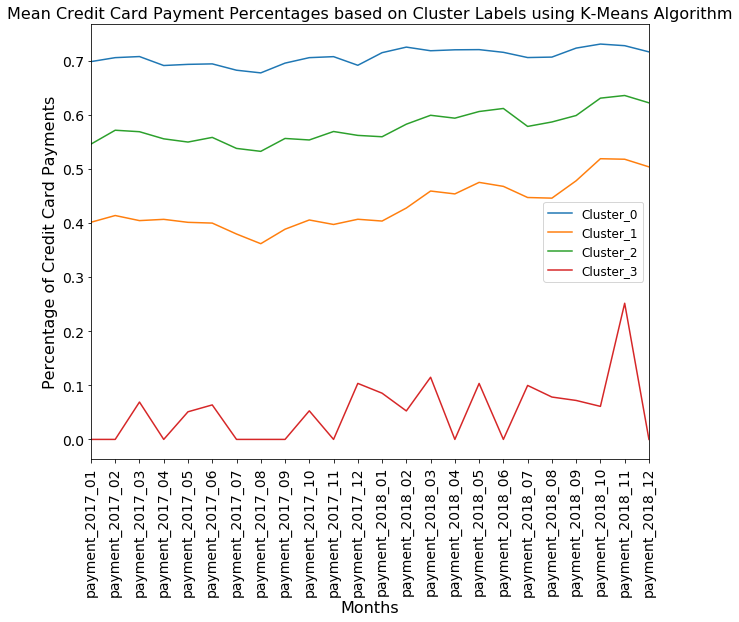

In [23]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['k3_labels']== 0 ].loc[:,"payment_2017_01":"payment_2018_12"].median().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['k3_labels']== 1 ].loc[:,"payment_2017_01":"payment_2018_12"].median().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['k3_labels']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].median().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['k3_labels']== 3 ].loc[:,"payment_2017_01":"payment_2018_12"].median().plot(ax=ax,label='Cluster_3',xticks=[i for i in range(0,24)],rot=90)

plt.xlabel("Months",fontsize=16.0)
plt.ylabel("Percentage of Credit Card Payments",fontsize=16.0)
plt.title("Mean Credit Card Payment Percentages based on Cluster Labels using K-Means Algorithm",fontsize=16.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.legend(fontsize=12.0)


In [24]:
gdf = gpd.GeoDataFrame.from_file('taxi_zones.shp')
gdf.set_index('OBJECTID',inplace=True)
merged_gdf = gdf.merge(cc_p[['k3_labels']],left_index=True, right_index=True)

In [357]:
merged_gdf[merged_gdf['k3_labels'] == 3]

,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,k3_labels
104,0.021221,0.000012,Governor's Island/Ellis Island/Liberty Island,103,Manhattan,"POLYGON ((973172.6661827862 194632.3480884731,...",3
110,0.103946,0.000526,Great Kills Park,110,Staten Island,"POLYGON ((951420.0923152268 139894.411383003, ...",3
173,0.060064,0.000178,North Corona,173,Queens,"POLYGON ((1024308.688545451 215593.5940625221,...",3
199,0.077809,0.000289,Rikers Island,199,Bronx,"POLYGON ((1015023.713440001 230286.7592163086,...",3
207,0.028376,0.000045,Saint Michaels Cemetery/Woodside,207,Queens,"POLYGON ((1011571.962184906 216050.1747058481,...",3


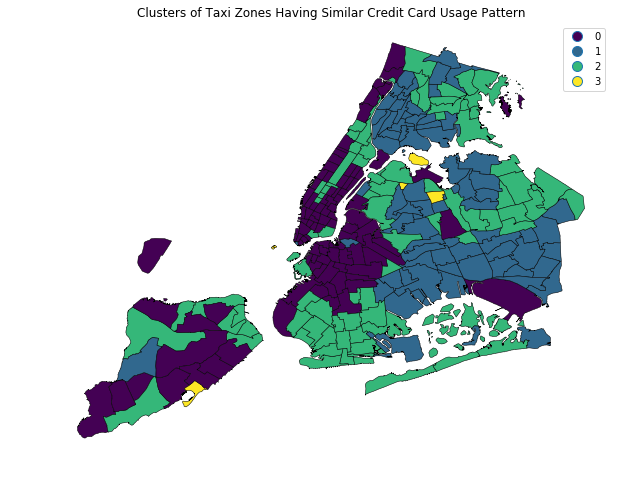

In [362]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='k3_labels',cmap='viridis',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)
ax.set_axis_off()
plt.title('Clusters of Taxi Zones Having Similar Credit Card Usage Pattern',fontsize=12.0)
plt.savefig('km_map.png')

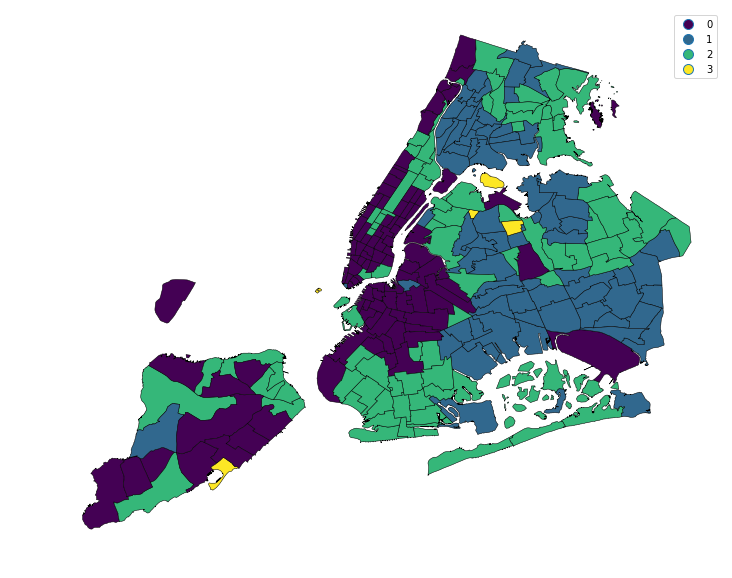

In [193]:
fig,ax = plt.subplots(figsize=(12,10))
merged_gdf.plot(ax=ax, column='k3_labels',cmap='viridis',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=0.5,categorical=True)
ax.set_axis_off()

### Complete-Link Clustering and Its Interpretation:

In [248]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# Choose a range of cluster numbers that you would like to evalulate:
range_n_clusters = range(2,10)
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'complete')

for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z, n_clusters, criterion='maxclust')    
    silhouette_avg = silhouette_score(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], cluster_labels)
    print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

For n_clusters = 2, the average silhouette_score is : 0.6660420783321614
For n_clusters = 3, the average silhouette_score is : 0.6592018887074608
For n_clusters = 4, the average silhouette_score is : 0.6505854484792567
For n_clusters = 5, the average silhouette_score is : 0.5159162123146659
For n_clusters = 6, the average silhouette_score is : 0.5220431458812509
For n_clusters = 7, the average silhouette_score is : 0.47844309221365106
For n_clusters = 8, the average silhouette_score is : 0.479307981429633
For n_clusters = 9, the average silhouette_score is : 0.48514805041551873


In [249]:
Z = linkage(cc_p.loc[:,"payment_2017_01":"payment_2018_12"], 'complete')
cluster_labels=fcluster(Z, 2, criterion='maxclust')   

In [250]:
cc_p['cl_cluster'] = cluster_labels

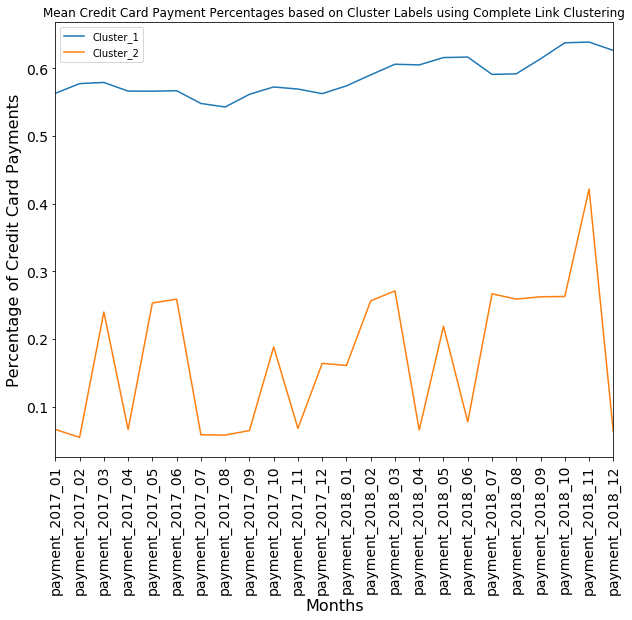

In [373]:
fig,ax = plt.subplots(figsize=(10,8))

cc_p[cc_p['cl_cluster']== 1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['cl_cluster']== 2 ].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2',xticks=[i for i in range(0,24)],rot=90)
plt.legend()
plt.xlabel("Months",fontsize=16.0)
plt.ylabel("Percentage of Credit Card Payments",fontsize=16.0)
plt.title("Mean Credit Card Payment Percentages based on Cluster Labels using Complete Link Clustering",fontsize=12.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.savefig('cl.png')

In [365]:
merged_gdf = gdf.merge(cc_p[['cl_cluster']],left_index=True, right_index=True)

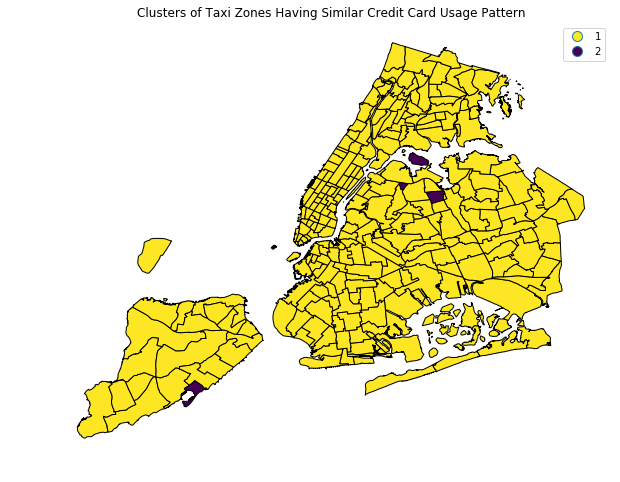

In [372]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='cl_cluster',cmap='viridis_r',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=1.0,categorical=True)
ax.set_axis_off()

plt.title('Clusters of Taxi Zones Having Similar Credit Card Usage Pattern',fontsize=12.0)
plt.savefig('cl_map.png')

### Gaussian Mixture Model Clustering Using Different Covariances Types:

In [285]:
import sklearn.mixture as sm
from scipy import linalg
import matplotlib as mpl
import numpy as np

In [286]:
n_components = np.arange(2,10)
models = [sm.GMM(n, covariance_type='full', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
          for n in n_components]

In [287]:
n_components = np.arange(2,10)
models_diag = [sm.GMM(n, covariance_type='diag', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
          for n in n_components]

In [288]:
n_components = np.arange(2,10)
models_spherical = [sm.GMM(n, covariance_type='spherical', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
          for n in n_components]

In [305]:
n_components = np.arange(2,10)
models_tied = [sm.GMM(n, covariance_type='tied', random_state=0).fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
          for n in n_components]

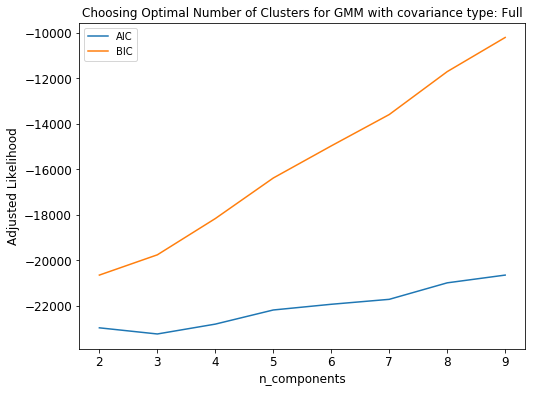

In [387]:
fig,ax = plt.subplots(figsize=(8,6))
plt.plot(n_components, [m.aic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models], label='AIC')
plt.plot(n_components, [m.bic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models], label='BIC')


plt.xlabel('n_components',fontsize=12.0);

plt.ylabel("Adjusted Likelihood",fontsize=12.0)
plt.title("Choosing Optimal Number of Clusters for GMM with covariance type: Full",fontsize=12.0)
plt.xticks(fontsize=12.0)
plt.yticks(fontsize=12.0)
plt.legend(loc='best')
plt.savefig('gmm_full.png')

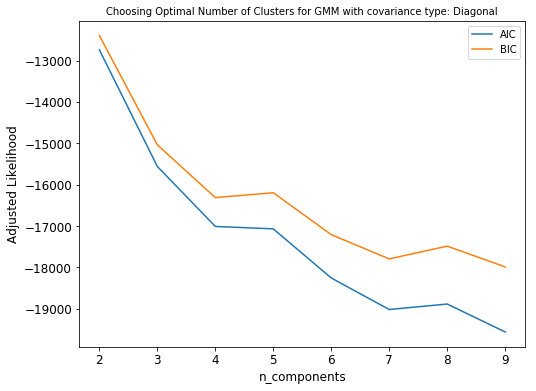

In [388]:
ig,ax = plt.subplots(figsize=(8,6))
plt.plot(n_components, [m.aic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models_diag], label='AIC')
plt.plot(n_components, [m.bic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models_diag], label='BIC')

plt.xlabel('n_components',fontsize=12.0);

plt.ylabel("Adjusted Likelihood",fontsize=12.0)
plt.title("Choosing Optimal Number of Clusters for GMM with covariance type: Diagonal",fontsize=10.0)
plt.xticks(fontsize=12.0)
plt.yticks(fontsize=12.0)
plt.legend(loc='best')
plt.savefig('gmm_diag.png')

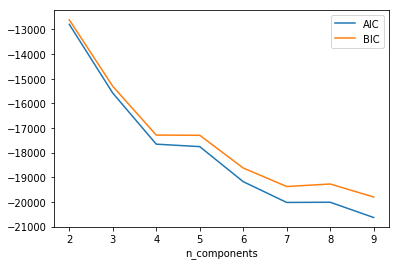

In [294]:
plt.plot(n_components, [m.aic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models_spherical], label='AIC')
plt.plot(n_components, [m.bic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models_spherical], label='BIC')

plt.legend(loc='best')
plt.xlabel('n_components');

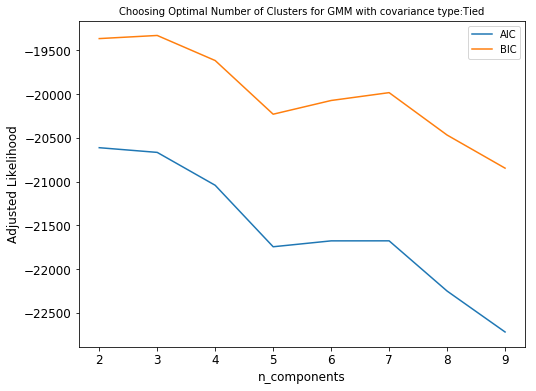

In [389]:
ig,ax = plt.subplots(figsize=(8,6))
plt.plot(n_components, [m.aic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models_tied], label='AIC')
plt.plot(n_components, [m.bic(cc_p.loc[:,"payment_2017_01":"payment_2018_12"]) for m in models_tied], label='BIC')

plt.xlabel('n_components',fontsize=12.0);

plt.ylabel("Adjusted Likelihood",fontsize=12.0)
plt.title("Choosing Optimal Number of Clusters for GMM with covariance type:Tied",fontsize=10.0)
plt.xticks(fontsize=12.0)
plt.yticks(fontsize=12.0)
plt.legend(loc='best')
plt.savefig('gmm_Tied.png')

In [296]:
GM=sm.GMM(n_components=3,random_state=0)
GM.fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=3, n_init=1, n_iter=100, params='wmc', random_state=0,
  thresh=None, tol=0.001, verbose=0)

In [297]:
GM_diag=sm.GMM(n_components=7,random_state=0)
GM_diag.fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=7, n_init=1, n_iter=100, params='wmc', random_state=0,
  thresh=None, tol=0.001, verbose=0)

In [298]:
GM_spherical=sm.GMM(n_components=7,random_state=0)
GM_spherical.fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=7, n_init=1, n_iter=100, params='wmc', random_state=0,
  thresh=None, tol=0.001, verbose=0)

In [309]:
GM_tied=sm.GMM(n_components=7,random_state=0)
GM_tied.fit(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

GMM(covariance_type='diag', init_params='wmc', min_covar=0.001,
  n_components=7, n_init=1, n_iter=100, params='wmc', random_state=0,
  thresh=None, tol=0.001, verbose=0)

In [301]:
pd.Series(GM.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])).value_counts()

1    100
0     84
2     80
dtype: int64

In [302]:
pd.Series(GM_diag.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])).value_counts()

0    63
4    59
1    49
5    45
3    43
2     4
6     1
dtype: int64

In [303]:
pd.Series(GM_spherical.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])).value_counts()

0    63
4    59
1    49
5    45
3    43
2     4
6     1
dtype: int64

In [310]:
pd.Series(GM_tied.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])).value_counts()

0    63
4    59
1    49
5    45
3    43
2     4
6     1
dtype: int64

In [312]:
labels_gmm = GM.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
labels_gmm_diag = GM_diag.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
labels_gmm_sph = GM_spherical.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])
labels_gmm_tied = GM_tied.predict(cc_p.loc[:,"payment_2017_01":"payment_2018_12"])

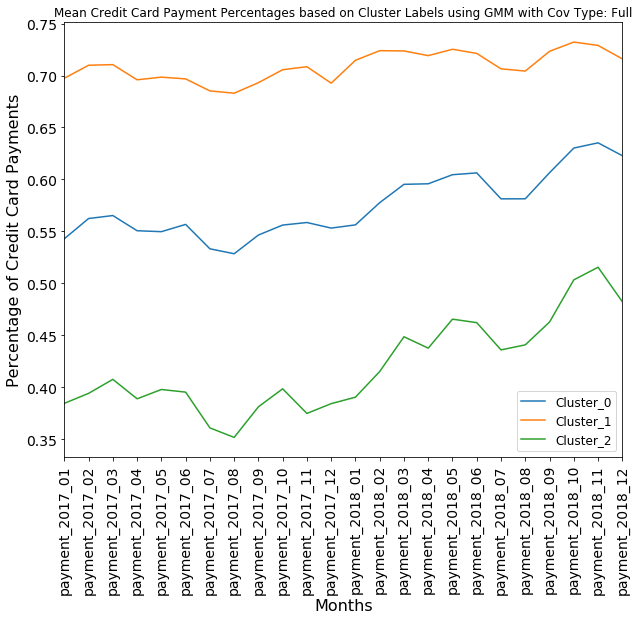

In [395]:
fig,ax = plt.subplots(figsize=(10,8))
cc_p['gmm_labels'] = labels_gmm
cc_p[cc_p['gmm_labels']==0].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['gmm_labels']==1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['gmm_labels']==2].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2',xticks=[i for i in range(0,24)],rot=90)
plt.xlabel("Months",fontsize=16.0)
plt.ylabel("Percentage of Credit Card Payments",fontsize=16.0)
plt.title("Mean Credit Card Payment Percentages based on Cluster Labels using GMM with Cov Type: Full",fontsize=12.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.savefig('gmm_full_t.png')
plt.legend(fontsize=12.0)

In [412]:
merged_gdf = gdf.merge(cc_p[['gmm_labels']],left_index=True, right_index=True)

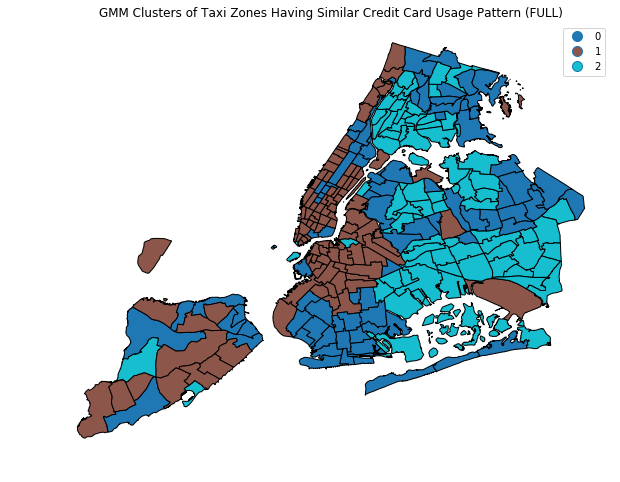

In [414]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='gmm_labels',cmap='tab10',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=1.0,categorical=True)
plt.title('GMM Clusters of Taxi Zones Having Similar Credit Card Usage Pattern (FULL)',fontsize=12.0)
ax.set_axis_off()
plt.savefig('gmm_map_full.png')

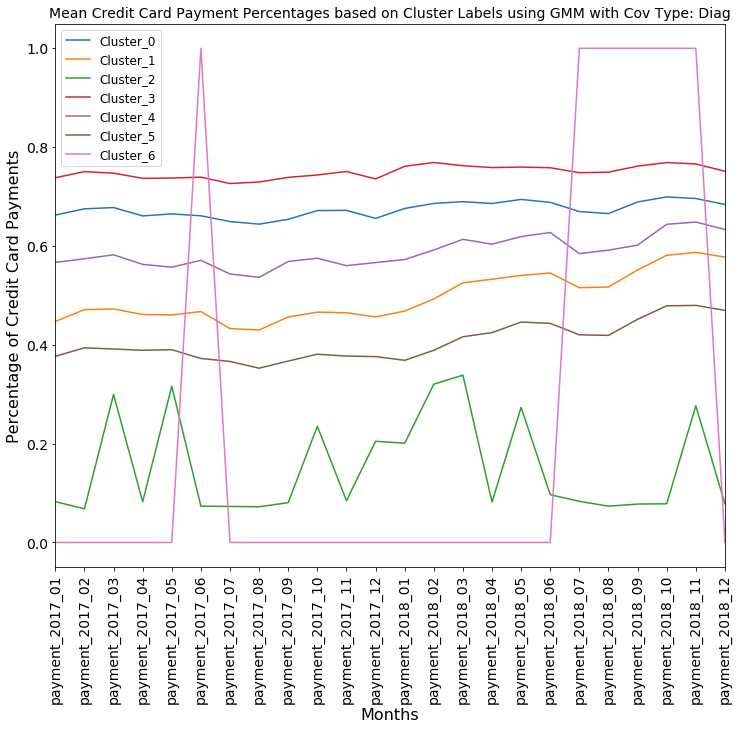

In [399]:
fig,ax = plt.subplots(figsize=(12,10))
cc_p['gmm_labels_diag'] = labels_gmm_diag
cc_p[cc_p['gmm_labels_diag']==0].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['gmm_labels_diag']==1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['gmm_labels_diag']==2].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['gmm_labels_diag']==3].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
cc_p[cc_p['gmm_labels_diag']==4].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_4')
cc_p[cc_p['gmm_labels_diag']==5].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_5')



cc_p[cc_p['gmm_labels_diag']==6].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_6',xticks=[i for i in range(0,24)],rot=90)

plt.xlabel("Months",fontsize=16.0)
plt.ylabel("Percentage of Credit Card Payments",fontsize=16.0)
plt.title("Mean Credit Card Payment Percentages based on Cluster Labels using GMM with Cov Type: Diag",fontsize=14.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.savefig('gmm_full_d.png')
plt.legend(fontsize=12.0)


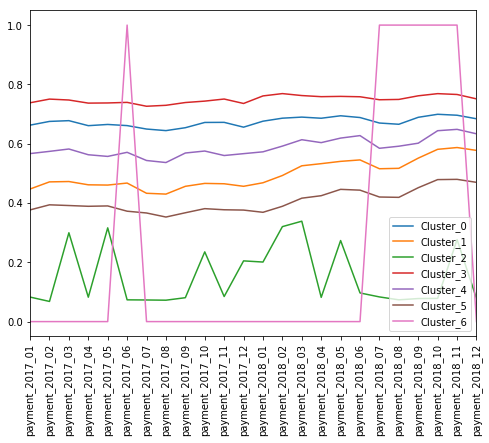

In [320]:
fig,ax = plt.subplots(figsize=(8,6))
cc_p['gmm_labels_sph'] = labels_gmm_sph
cc_p[cc_p['gmm_labels_sph']==0].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['gmm_labels_sph']==1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['gmm_labels_sph']==2].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['gmm_labels_sph']==3].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
cc_p[cc_p['gmm_labels_sph']==4].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_4')
cc_p[cc_p['gmm_labels_sph']==5].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_5')



cc_p[cc_p['gmm_labels_sph']==6].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_6',xticks=[i for i in range(0,24)],rot=90)

plt.legend()

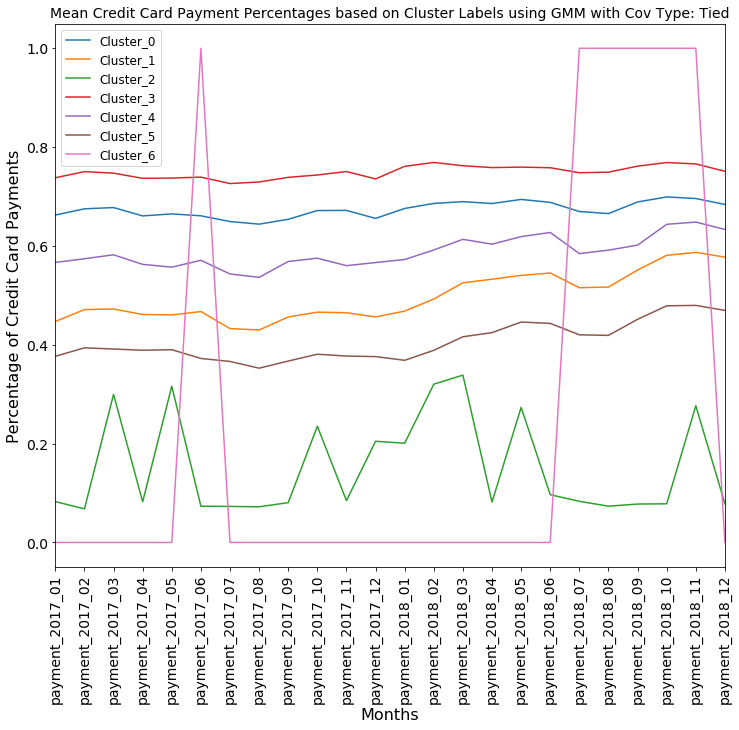

In [402]:
fig,ax = plt.subplots(figsize=(12,10))
cc_p['gmm_labels_tied'] = labels_gmm_tied
cc_p[cc_p['gmm_labels_tied']==0].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_0')
cc_p[cc_p['gmm_labels_tied']==1].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_1')
cc_p[cc_p['gmm_labels_tied']==2].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_2')
cc_p[cc_p['gmm_labels_tied']==3].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_3')
cc_p[cc_p['gmm_labels_tied']==4].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_4')
cc_p[cc_p['gmm_labels_tied']==5].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_5')



cc_p[cc_p['gmm_labels_tied']==6].loc[:,"payment_2017_01":"payment_2018_12"].mean().plot(ax=ax,label='Cluster_6',xticks=[i for i in range(0,24)],rot=90)
plt.xlabel("Months",fontsize=16.0)
plt.ylabel("Percentage of Credit Card Payments",fontsize=16.0)
plt.title("Mean Credit Card Payment Percentages based on Cluster Labels using GMM with Cov Type: Tied",fontsize=14.0)
plt.xticks(fontsize=14.0)
plt.yticks(fontsize=14.0)
plt.savefig('gmm_full_t.png')
plt.legend(fontsize=12.0)

In [404]:
merged_gdf = gdf.merge(cc_p[['gmm_labels_diag']],left_index=True, right_index=True)

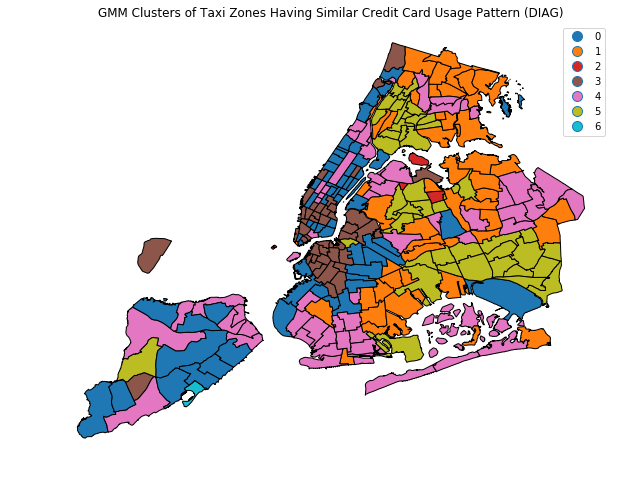

In [406]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='gmm_labels_diag',cmap='tab10',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=1.0,categorical=True)
plt.title('GMM Clusters of Taxi Zones Having Similar Credit Card Usage Pattern (DIAG)',fontsize=12.0)
ax.set_axis_off()
plt.savefig('gmm_map_diag.png')

In [407]:
merged_gdf = gdf.merge(cc_p[['gmm_labels_tied']],left_index=True, right_index=True)

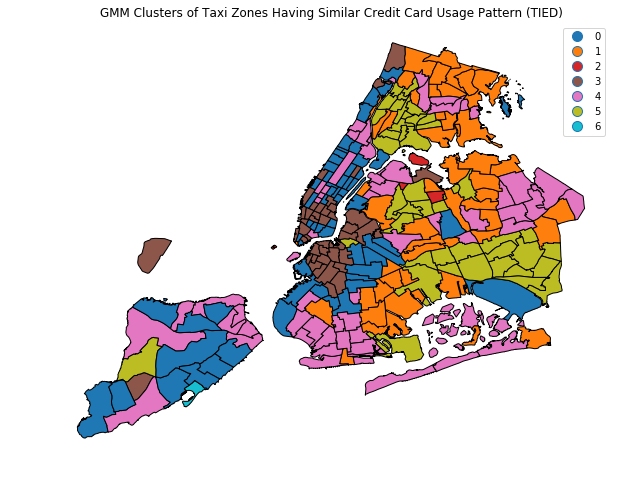

In [410]:
fig,ax = plt.subplots(figsize=(10,8))
merged_gdf.plot(ax=ax, column='gmm_labels_tied',cmap='tab10',figsize=(20,20),legend=True,label='clusters',edgecolor='black' ,linewidth=1.0,categorical=True)
plt.title('GMM Clusters of Taxi Zones Having Similar Credit Card Usage Pattern (TIED)',fontsize=12.0)
ax.set_axis_off()
plt.savefig('gmm_map_tied.png')